<a href="https://colab.research.google.com/github/wkzawadzka/Raport10/blob/master/raport7_project_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raport 7

**link do certifikatu**: https://app.dataquest.io/view_cert/KQAYPXS30XU5XSLTU46U

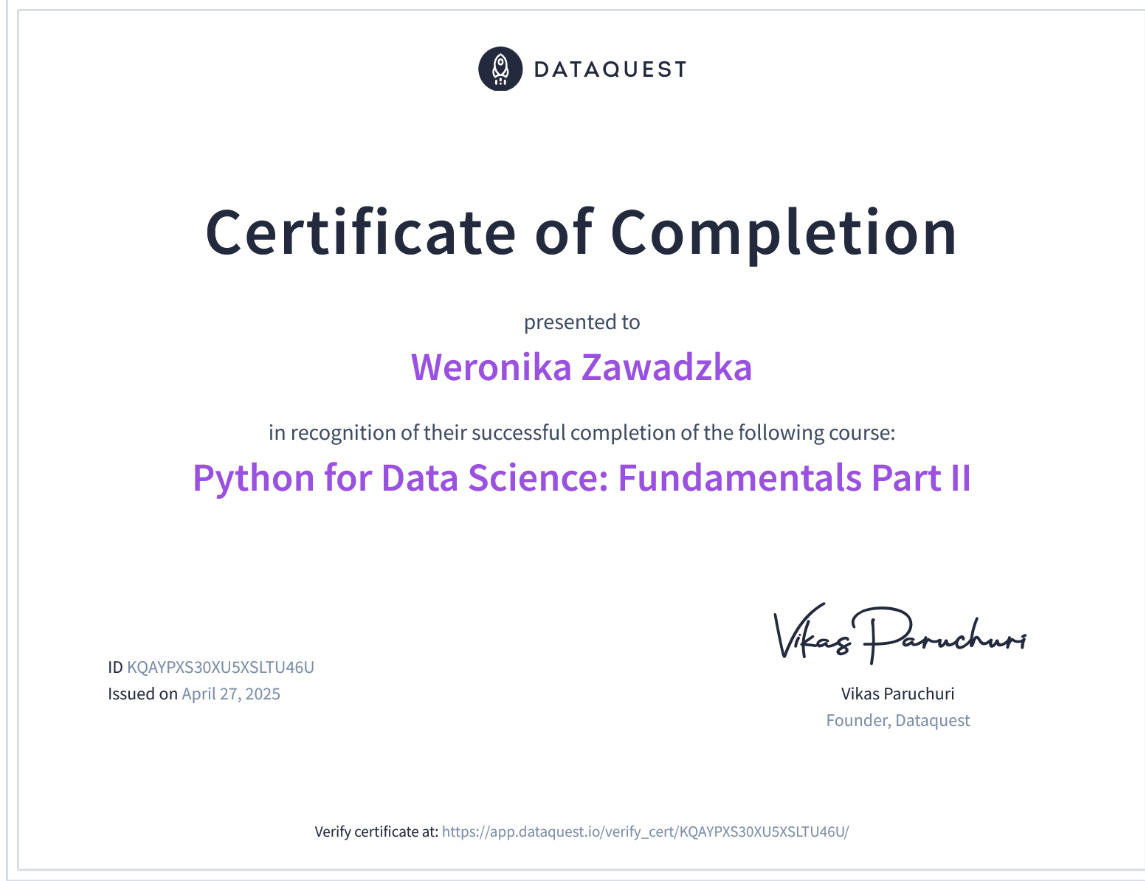



Wrażenia: Podobało mi się, że projekt był już w google collabie i że można byłobyć bardziej samodzielnym, próbować różnych metod. Odpowiedzi były również podane, więc w razie problemów można było sobie porównać czy zainspirować się. Ogółem ta sekcja była dla mnie najlepsza i była też najciekawsza. Jeśli chodzi o sam projekt, jeden pomysł który myślę że jest warty podzielenia się to zamiast usuwania rekordu, który miał złą ilość kolumn, warto na niego spojrzeć i go naprawić. Czyli zamiast usuwania, dać None w odowiedniej kolumnie, żeby shiftować resztę kolumn w prawo. W taki sposób mamy 1 więcej obserwacje.

## podsekcja na projekt

### About

This is a project titled "Profitable App Profiles for the App Store and Google Play Markets". It focuses on Analyzing Mobile App Data. Aim is to determine the kinds of apps that are likely to attract more users.

In [ ]:
import pandas as pd
from csv import reader

### Download data

In [ ]:
!wget https://dq-content.s3.amazonaws.com/350/googleplaystore.csv
!wget https://dq-content.s3.amazonaws.com/350/AppleStore.csv

--2025-04-27 17:09:15--  https://dq-content.s3.amazonaws.com/350/googleplaystore.csv
Resolving dq-content.s3.amazonaws.com (dq-content.s3.amazonaws.com)... 3.5.30.59, 3.5.8.185, 3.5.31.110, ...
Connecting to dq-content.s3.amazonaws.com (dq-content.s3.amazonaws.com)|3.5.30.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1349314 (1.3M) [text/csv]
Saving to: ‘googleplaystore.csv’

googleplaystore.csv 100%[===================>]   1.29M  3.56MB/s    in 0.4s    

2025-04-27 17:09:16 (3.56 MB/s) - ‘googleplaystore.csv’ saved [1349314/1349314]

--2025-04-27 17:09:16--  https://dq-content.s3.amazonaws.com/350/AppleStore.csv
Resolving dq-content.s3.amazonaws.com (dq-content.s3.amazonaws.com)... 3.5.30.59, 3.5.8.185, 3.5.31.110, ...
Connecting to dq-content.s3.amazonaws.com (dq-content.s3.amazonaws.com)|3.5.30.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 725761 (709K) [text/csv]
Saving to: ‘AppleStore.csv’

AppleStore.csv      100%[====

In [ ]:
google = pd.read_csv('googleplaystore.csv')
apple = pd.read_csv('AppleStore.csv')

### Data exploration

In [ ]:
def explore_data(dataset, start, end, rows_and_columns=False):
  display(dataset[start:end])
  if rows_and_columns:
    print('Number of rows:', dataset.shape[0])
    print('Number of columns:', dataset.shape[1])

In [ ]:
explore_data(google, 0, 3, True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Number of rows: 10841
Number of columns: 13


Możemy zauważyć, że ten rekord jest porozsuwany:

In [ ]:
google[google["Price"] == "Everyone"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
", ".join(list(google.columns)) # print colnames

'App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver'

In [ ]:
explore_data(apple, 0, 3, True)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1


Number of rows: 7197
Number of columns: 16


In [ ]:
", ".join(list(apple.columns)) # print colnames

'id, track_name, size_bytes, currency, price, rating_count_tot, rating_count_ver, user_rating, user_rating_ver, ver, cont_rating, prime_genre, sup_devices.num, ipadSc_urls.num, lang.num, vpp_lic'

### Deleting Wrong Data

We need to do the following:

- Detect inaccurate data, and correct or remove it.
- Detect duplicate data, and remove the duplicates.

  Recall that at our company, we only build apps that are free to download and install, and we design them for an English-speaking audience. This means that we'll need to do the following:

  Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
  Remove apps that aren't free.



Najpierw naprawmy wcześniej zindentifikowany rekord:

In [ ]:
display(google[google["Price"] == "Everyone"])
values = google[google["Price"] == "Everyone"].values[0][1:-1]
values[0] = float(values[0]) # rating to float
google.loc[google["Price"] == "Everyone", "Category"] = pd.NA
google.loc[google["App"] == "Life Made WI-Fi Touchscreen Photo Frame", google.columns[2:]] = values
display(google[google["App"] == "Life Made WI-Fi Touchscreen Photo Frame"])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,<NA>,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [ ]:
def is_english(string: str):
    count = 0
    for character in string:
        if ord(character) > 127:
            count += 1
            if count > 3:
              return False
    return True

def is_free(price):
    if isinstance(price, (int, float)):
      numeric_part = price
    else:
      # e.g. price '$4.99'
      numeric_part = ''.join(char for char in price if char.isdigit() or char == '.')
      numeric_part = float(numeric_part) if numeric_part else None

    #print(f"curr: {numeric_part} > 0? {numeric_part > 0}")
    if numeric_part == None or numeric_part > 0:
      return False
    return True

def clean_data(dataset: pd.DataFrame, name_col: str, price_col: str):
    print('Size before cleaning:', dataset.shape)

    # name is english
    dataset = dataset[dataset[name_col].apply(lambda x: is_english(x))]

    # price > 0
    dataset = dataset[dataset[price_col].apply(lambda x: is_free(x))]

    print('Size after cleaning:', dataset.shape)

    return dataset

In [ ]:
google = clean_data(google, "App", "Price")

Size before cleaning: (10841, 13)
Size after cleaning: (10000, 13)


In [ ]:
apple = clean_data(apple, "track_name", "price")

Size before cleaning: (7197, 16)
Size after cleaning: (3222, 16)


Detect and correct duplicate data

In [ ]:
def detect_duplicates(data: pd.DataFrame, column_name: str):
    seen = set()
    count = 0

    for idx, row in data.iterrows():
        value = row[column_name]

        if value not in seen:
            seen.add(value)
        else:
            count += 1

    print(f"{count} duplicates found.")

In [ ]:
detect_duplicates(google, "App")
detect_duplicates(apple, "track_name")

1135 duplicates found.
2 duplicates found.


In [ ]:
def to_numeric(col):
    if isinstance(col, (int, float)):
      numeric_part = col
    else:
      # e.g. review '20M'
      numeric_part = ''.join(char for char in col if char.isdigit() or char == '.')
      numeric_part = float(numeric_part) if numeric_part else None
    return numeric_part

def remove_duplicates(data: pd.DataFrame, column_name: str, reviews_col: str):
    print(f"Size before: {data.shape}")
    seen = set()
    best_rows = {}

    for idx, row in data.iterrows():
        value = row[column_name]
        row[reviews_col] = to_numeric(row[reviews_col])

        if value not in seen:
            seen.add(value)
            best_rows[value] = row
        else:
            if row[reviews_col] > best_rows[value][reviews_col]:
                best_rows[value] = row

    best_rows_df = pd.DataFrame.from_dict(best_rows, orient='index')
    print(f"Size after: {best_rows_df.shape}")
    return best_rows_df

In [ ]:
google = remove_duplicates(google, "App", "Reviews")

Size before: (10000, 13)
Size after: (8865, 13)


In [ ]:
apple = remove_duplicates(apple, "track_name", "rating_count_tot")

Size before: (3222, 16)
Size after: (3220, 16)


### Most Common Apps by Genre

To minimize risks and overhead, our validation strategy for an app idea has three steps:

- Build a minimal Android version of the app, and add it to Google Play.
- If the app has a good response from users, we develop it further.
- If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful in both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

In [ ]:
def freq_table(data: pd.DataFrame, column_name: str, do_split = False, separator = ";"):
    table = {}
    total = 0

    for value in data[column_name]:
        if pd.isna(value):
            continue
        if do_split:
            parts = str(value).split(separator)
        else:
            parts = [str(value)]

        for part in parts:
          total += 1
          if part in table:
              table[part] += 1
          else:
              table[part] = 1

    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage

    return table_percentages

import matplotlib.pyplot as plt
def visualize_freq_table(freq_dict: dict, title: str = "Frequency Table"):
    df = pd.DataFrame(list(freq_dict.items()), columns=["Value", "Percentage"])
    df = df.sort_values(by="Percentage", ascending=False)

    # plot
    plt.figure(figsize=(10,6))
    plt.bar(df["Value"], df["Percentage"], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Percentage (%)")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

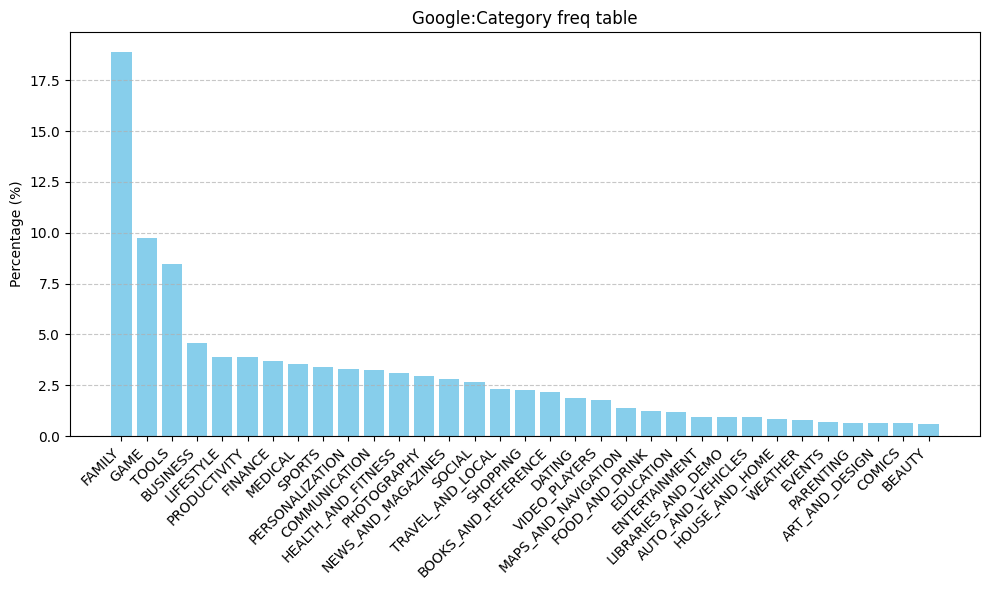

In [ ]:
visualize_freq_table(freq_table(google, "Category"), title = "Google:Category freq table")

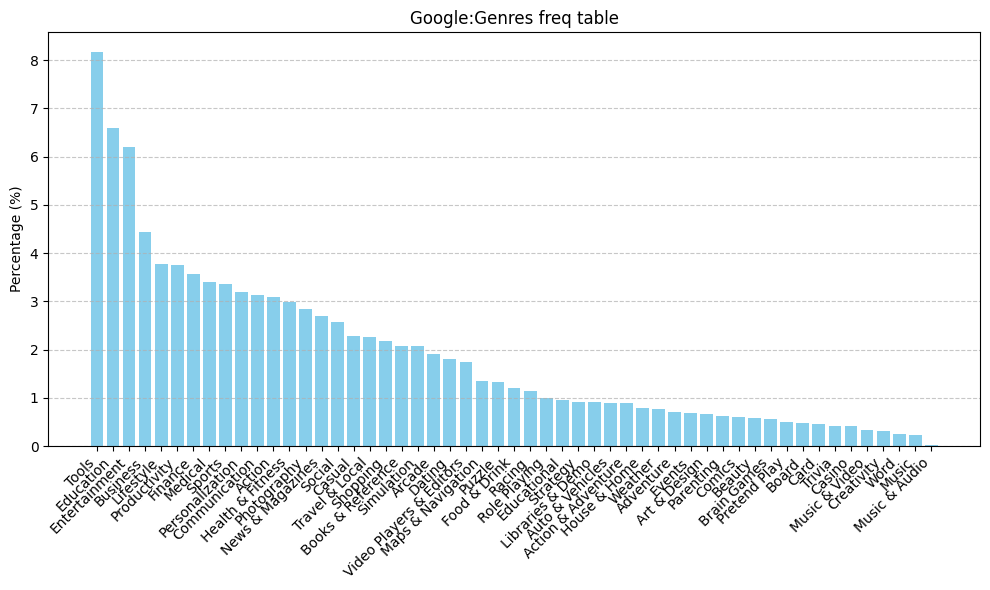

In [ ]:
visualize_freq_table(freq_table(google, "Genres", do_split=True), title = "Google:Genres freq table")

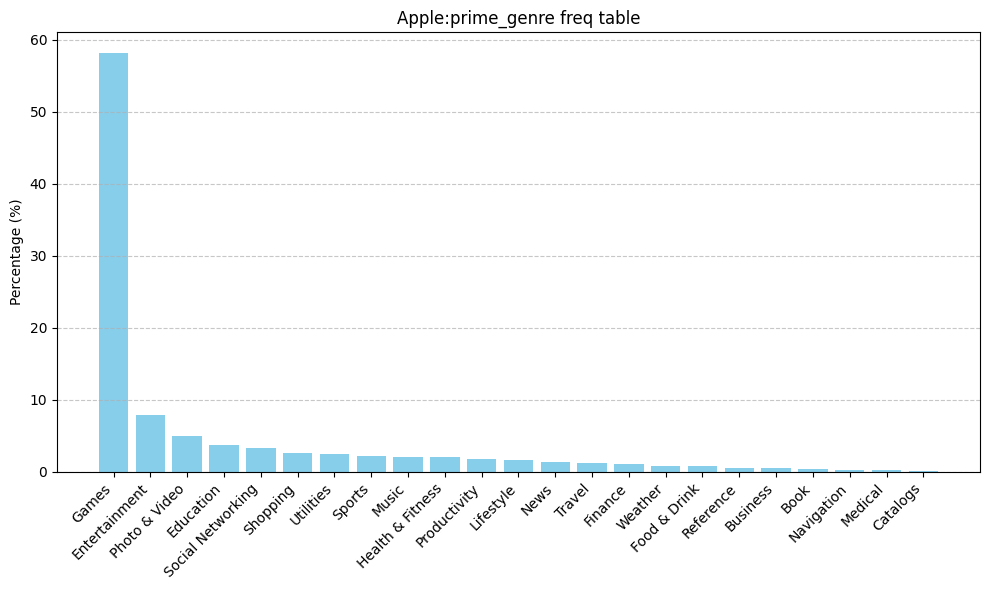

In [ ]:
visualize_freq_table(freq_table(apple, "prime_genre"), title = "Apple:prime_genre freq table")

Analyzing frequency tables

"Remember our dataset only contains free English apps, so you should be careful not to extend your conclusions beyond that scope. If you find that gaming apps are the most numerous among the free English apps on Google Play, it doesn't mean we'll see the same pattern on Google Play as a whole."

**Apple Store**

1. What is the most common genre? What is the next most common?

"Games" and by far - this genre is having huge gap between it and other genres. It consitutes approx. 58% of our dataset. Next in line in "Entertainment".

2. What other patterns do you see?

I would have expected other genres not to be so low compared to Games. However, Games are likely one of the easiest categories to program and develop, and they also attract a lot of interest from users. So it can be said that App Store is dominated by Games.

3. What is the general impression — are most of the apps designed for practical purposes (education, shopping, utilities, productivity, lifestyle) or more for entertainment (games, photo and video, social networking, sports, music)?

Most are for entertainment with games, entertainment and photo and video genres being at the very top.

**Google Play**


1. What are the most common genres?

Generes - Tools, Education, Entertainment
Categories - Family, Game, Tools

2. What other patterns do you see?

Here it is a bit different. We do not have such unbalanced results as it was with Google Apps. We do have a winner (Tools or Family) but other ones also consitute important part.

3. Compare the patterns you see for the Google Play market with those you saw for the App Store market.

It seems very different. I am insterested what types of apps go into "Tools" or "Family" categories. -- After checking Family category looks like games only.

**combined**
Can you recommend an app profile based on what you found so far? Do the frequency tables you generated reveal the most frequent app genres or what genres have the most users?

Well, not only count of type of apps should be important but also reviews, installs etc. For example, apps like Facebook can have much more users than like even thousands small game apps. So I think we should dig deeper to answear this question.



In [ ]:
def average_stat_by_genre(data: pd.DataFrame, genre_col: str, stat_col: str):
    data[stat_col] = data[stat_col].apply(to_numeric)
    grouped = data.groupby(genre_col).agg(
        total_stat = (stat_col, 'sum'),
        app_count = (stat_col, 'count')
    )

    grouped["avg_stat"] = grouped["total_stat"] / grouped["app_count"]
    grouped = grouped.sort_values(by="avg_stat", ascending=False)

    return grouped

In [ ]:
average_stat_by_genre(google, "Category", "Installs")

,total_stat,app_count,avg_stat
Category,,,
COMMUNICATION,1.103691e+10,287,3.845612e+07
VIDEO_PLAYERS,3.931732e+09,159,2.472787e+07
SOCIAL,5.487862e+09,236,2.325365e+07
PHOTOGRAPHY,4.656269e+09,261,1.784011e+07
PRODUCTIVITY,5.791629e+09,345,1.678733e+07
GAME,1.343687e+10,862,1.558802e+07
TRAVEL_AND_LOCAL,2.894704e+09,207,1.398408e+07
ENTERTAINMENT,9.894600e+08,85,1.164071e+07
TOOLS,8.101043e+09,750,1.080139e+07


In [ ]:
average_stat_by_genre(apple, "prime_genre", "rating_count_tot")

,total_stat,app_count,avg_stat
prime_genre,,,
Navigation,516542,6,86090.333333
Reference,1348958,18,74942.111111
Social Networking,7584125,106,71548.349057
Music,3783551,66,57326.530303
Weather,1463837,28,52279.892857
Book,556619,14,39758.500000
Food & Drink,866682,26,33333.923077
Finance,1132846,36,31467.944444
Photo & Video,4550647,160,28441.543750


**Analyze the results and try to come up with at least one app profile recommendation for the App Store.**

It does make sense Navigation is at the top - Google Maps or other apps or this type are used everyday or at least often by majority of people.

In [ ]:
apple[apple["prime_genre"] == "Navigation"].sort_values(by="rating_count_tot", ascending=False)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
"Waze - GPS Navigation, Maps & Real-time Traffic",323229106,"Waze - GPS Navigation, Maps & Real-time Traffic",94139392,USD,0.0,345046,3040,4.5,4.5,4.24,4+,Navigation,37,5,36,1
Google Maps - Navigation & Transit,585027354,Google Maps - Navigation & Transit,120232960,USD,0.0,154911,1253,4.5,4.0,4.31.1,12+,Navigation,37,5,34,1
Geocaching®,329541503,Geocaching®,108166144,USD,0.0,12811,134,3.5,1.5,5.3,4+,Navigation,37,0,22,1
CoPilot GPS – Car Navigation & Offline Maps,504677517,CoPilot GPS – Car Navigation & Offline Maps,82534400,USD,0.0,3582,70,4.0,3.5,10.0.0.984,4+,Navigation,38,5,25,1
ImmobilienScout24: Real Estate Search in Germany,344176018,ImmobilienScout24: Real Estate Search in Germany,126867456,USD,0.0,187,0,3.5,0.0,9.5,4+,Navigation,37,5,3,1
Railway Route Search,463431091,Railway Route Search,46950400,USD,0.0,5,0,3.0,0.0,3.17.1,4+,Navigation,37,0,1,1


But as we can see it is hugely influenced by Google Maps and Waze. So it is not that Navigation is very popular in itself, but the average is the highest because of these two apps. Since these have monopoly in this Genre it would be very risky to try to develop something new in this particular niche. Let us look at second highest, which is reference:

In [ ]:
apple[apple["prime_genre"] == "Reference"].sort_values(by="rating_count_tot", ascending=False).iloc[0:5]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
Bible,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
Dictionary.com Dictionary & Thesaurus,308750436,Dictionary.com Dictionary & Thesaurus,111275008,USD,0.0,200047,177,4.0,4.0,7.1.3,4+,Reference,37,0,1,1
Dictionary.com Dictionary & Thesaurus for iPad,364740856,Dictionary.com Dictionary & Thesaurus for iPad,165748736,USD,0.0,54175,10176,4.5,4.5,4.0,4+,Reference,24,5,9,1
Google Translate,414706506,Google Translate,65281024,USD,0.0,26786,27,3.5,4.5,5.10.0,4+,Reference,37,5,59,1
"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran",388389451,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",100551680,USD,0.0,18418,706,4.5,5.0,9.2.1,4+,Reference,37,5,16,1


We see again that mean is squewed by two apps in this category: maily the Bible and then Dictionary.com.

**Analyze the results and try to come up with at least one app profile recommendation for the Google Play.**

COMMUNICATION, VIDEO_PLAYERS, and SOCIAL are at the top. Let us look at the apps:

In [ ]:
google[google["Category"] == "COMMUNICATION"].sort_values(by="Installs", ascending=False).iloc[0:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Gmail,Gmail,COMMUNICATION,4.3,4604483.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
Messenger – Text and Video Chat for Free,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
Google Chrome: Fast & Secure,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
WhatsApp Messenger,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
Hangouts,Hangouts,COMMUNICATION,4.0,3419513.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device


Here we see, at least for the top five, the number of Installs is same and very high.

In [ ]:
google[google["Category"] == "VIDEO_PLAYERS"].sort_values(by="Installs", ascending=False).iloc[0:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
YouTube,YouTube,VIDEO_PLAYERS,4.3,25655305.0,Varies with device,1.000000e+09,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
Google Play Movies & TV,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,Varies with device,1.000000e+09,Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
MX Player,MX Player,VIDEO_PLAYERS,4.5,6474672.0,Varies with device,5.000000e+08,Free,0,Everyone,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
VLC for Android,VLC for Android,VIDEO_PLAYERS,4.4,1032076.0,Varies with device,1.000000e+08,Free,0,Everyone,Video Players & Editors,"July 30, 2018",Varies with device,2.3 and up
Motorola Gallery,Motorola Gallery,VIDEO_PLAYERS,3.9,121916.0,23M,1.000000e+08,Free,0,Everyone,Video Players & Editors,"January 25, 2016",Varies with device,Varies with device


Same can be said for category VIDEO_PLAYERS. Youtube and Google Play Moviess do have large advantage in Installs but other apps are high as well. However, it is very hard to come up with an app in this category that will be successful because users are already satisfied and used to current apps.

### Conclusions

Despite Games not being at the top in the install analysis, I think this is the category in which new apps are always exciting and it can be a good start at developing apps. Install analysis showed us well established niches with dominating apps, where it would be very hard and risky to develop something different or innovative. Therefore, I would say we could pick the genre from app count analysis and look from there.